In [186]:
%reset -f 
import importlib
import numpy as np
from matplotlib.animation import FuncAnimation
import os
from datetime import datetime
from IPython.display import HTML
import aif_functions_depth as aif


pwd = os.path.abspath('') + "/"
print(pwd)
importlib.reload(aif)

c:\Users\qbr5kx\OneDrive - University of Virginia\Desktop\UVA\PhD Scratch\Active_Epistemic_Inference\particle_filter_robot/


<module 'aif_functions_depth' from 'c:\\Users\\qbr5kx\\OneDrive - University of Virginia\\Desktop\\UVA\\PhD Scratch\\Active_Epistemic_Inference\\particle_filter_robot\\aif_functions_depth.py'>

Initial Prior:  [0.5 0.5]
[0.5070699239523591, 0.7123248936476605, 0.4150360020227879]
Agents have converged to Goal 1 after 10 iterations.
Final Prior:  [array([0.34689261, 0.65310739]), array([0.34896866, 0.65103134]), array([0.64342807, 0.35657193])]
Agent Types:  ['A', 'A', 'B']


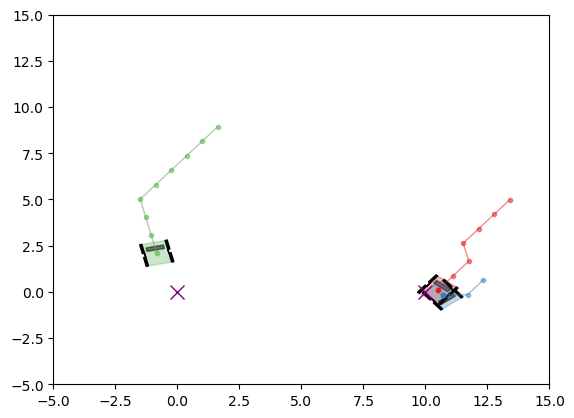

In [213]:
# Re-define the environment and simulation parameters here
args = {}
random_seed = 6  # Random seed #2,5,6 are interesting; 6 diverges, 2 & 5 converges ---- 6 is the best for our scenario ->
# 6 is the best for the following reasons:
# If any agent except the third agent is type B, then the agents converge to the correct goal
# If the third agent is type B, the agents are unable to converge to the same goal
np.random.seed(random_seed)  # Set random seed
# Set random goals
env_size = 15  # Environment size
num_goals = 2  # Number of goals
num_agents = 3  # Number of agents
list_types = ['A','B']
# goals = np.random.uniform(0,env_size,size=(num_goals, 2))  # Goal positions
goals = np.array([[0,0],[10,0]], dtype=float)  # Goal positions
agent_positions = np.hstack((np.random.uniform(0,env_size,size=(num_agents, 2)),np.zeros((num_agents,1))))  # Initial agent positions
args['goals'] = np.copy(goals)
args['agent_types'] = ['A','A','B']#np.random.choice(list_types,num_agents)  # Agent types
args['agent_positions'] = agent_positions
args['velocity_options'] = [0.0, 0.01, 0.1, 0.5, 1.0]  # Velocity options for the agents
args['num_heading_options'] = 8  # Number of heading options
args['heading_options'] = np.linspace(-np.pi,np.pi,args['num_heading_options'],endpoint=True)  # Heading options for the agents
args['observation_error_std'] = 0.0  # Observation noise standard deviation
max_iterations = 100  # Maximum number of iterations
args['max_distance_measure'] = 10  # Maximum distance measure for likelihood calculation
args['max_heading_measure'] = np.pi  # Maximum heading measure for likelihood calculation
args['prior'] = np.ones(goals.shape[0]) / goals.shape[0]  # Prior over goals

print("Initial Prior: ", args['prior'])

# Run the simulation
final_positions, goal_converged, num_frames, return_args, prior, avg_nrg_over_time = aif.run_simulation(args)
print("Final Prior: ", prior)
print("Agent Types: ", args['agent_types'])
# Create animation
plt_sim = aif.PlotSim(num_agents,goals)
ani = FuncAnimation(plt_sim.fig, plt_sim.update, frames=range(num_frames), init_func=plt_sim.init, fargs = (return_args,), blit=True, repeat=True)

# Save the animation as a video
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
HTML(ani.to_jshtml()) # Use an interactive backend for animation

# ani.save(pwd + "videos/hetero_bad" + current_time + ".mp4", writer='ffmpeg', fps=3, dpi=300)
# print("Image saved as: ", pwd + "videos/two_goals_choice" + current_time + ".mp4")


[[ 0.  0.]
 [10.  0.]]


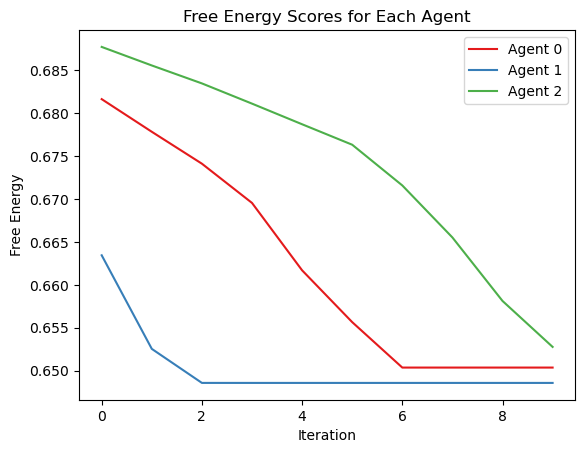

['B', 'B', 'B']


In [211]:
print(goals)
energy_results = aif.parse_free_energy_scores(avg_nrg_over_time)
aif.plot_energy(energy_results, num_agents)
print(args['agent_types'])

In [184]:
# Scratch code for testing
my_heading = np.pi/2
object_heading = np.pi/2
object_position = np.array([0.,-1.])
goal = np.array([0.,5.])
my_position = np.array([0.,0.])

my_vel = 0.5
heading_change = 0.1

goal_azimuth = np.arctan2(goal[1] - my_position[1], goal[0] - my_position[0])
relative_azimuth = np.arctan2(my_position[1] - object_position[1], my_position[0] - object_position[0])

print("Goal Azimuth: ", goal_azimuth)
print("Relative Azimuth: ", relative_azimuth)
np.arctan2(1,0)

Goal Azimuth:  1.5707963267948966
Relative Azimuth:  1.5707963267948966


1.5707963267948966